In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Генерация данных из БД по тех.режиму

* **well_name** - название скважины
* **xr** - виды скважин
* **se** - способ эксплуатации (ЭЦН, ФОН)
* **ss** - статус (в работе\ВНР)
* **q_fluid** - дебит флюида
* **wcutting** - обводненность
* **p_buff, p_buff_tm** - буферное давление (ручное, датчик (ТМ))
* **gas_factor** - газовый фактор
* **f_rotat, f_rotat_tm** - частота вращения насоса (ручное, датчик (ТМ))
* **Пласт**
* **Удл** - Удлинение на глубине (м)
* **Н сп** - Глубина спуска насоса (м)
* **p_intake, p_intake_tm** - давление на приеме скважины (таргет)
______

715 000 наблюдений (до очистки)

In [ ]:
np.random.seed(42)

In [ ]:
df = pd.DataFrame()

In [ ]:
# Генерация уникальных случайных значений
unique_values = np.sort(np.random.choice(range(45, 9000), 1400, replace=False))

# Рассчитаем количество повторений для каждого уникального значения
rep_value = 715000 // len(unique_values)
remain_element = 715000 % len(unique_values)

# Создаем массив признаков путем повторения каждого уникального значения необходимое количество раз
well_name = []
for i in range(len(unique_values)):
    repeat_times = rep_value + (i < remain_element)
    well_name.extend([unique_values[i]] * repeat_times)

# Преобразуем список обратно в NumPy-массив
df['well_name'] = np.array(well_name)

In [ ]:
categories = {
    "Нефтяные": 400000,
    "Нефтяная": 200000,
    "Нагнетательные": 50000,
    "Газоконденсатная": 50000,
    "Газоконденсатные": 6000,
    "Водонагнетальная": 7000,
    "Поглощающие": 2000
}

In [ ]:
values = []
for category, count in categories.items():
    values += [category] * count

np.random.shuffle(values)

In [ ]:
df['xr'] = values

In [ ]:
categories = {
    "Электропогружным насосом": 200000,
    "ЭЦН": 200000,
    "Фонтанный": 200000,
    "ФОН": 115000,
}

In [ ]:
values = []
for category, count in categories.items():
    values += [category] * count

np.random.shuffle(values)

In [ ]:
df['se'] = values

In [ ]:
categories = {
    "В работе": 550000,
    "В ликвидации": 20000,
    "Остановлена": 15000,
    "ВНР": 130000,
}

In [ ]:
values = []
for category, count in categories.items():
    values += [category] * count

np.random.shuffle(values)

In [ ]:
df['ss'] = values

Сгенерировать числовой признак с 715 000 наблюдений, у которого среднее = 30, стандартное отклонение 75, минимум 0, максимум, 23 000, значений "0" ровно 120 000 наблюдений, и до 50% выборки до значения 40, от 50% до 75% от 39 до 45, и от 75% выборки и далее от 45 до 23 000

In [ ]:
# Общее количество наблюдений
total_obs = 715000

# Количество нулей
zeros_count = 120000

# Остальные наблюдения
rest_obs = total_obs - zeros_count

# Группировка оставшихся наблюдений
first_half = int(rest_obs * 0.5)
second_quarter = int(rest_obs * 0.25)
last_part = rest_obs - first_half - second_quarter

# Генерация случайных чисел внутри указанных диапазонов
data_first_half = np.random.uniform(low=0, high=40, size=first_half)
data_second_quarter = np.random.uniform(low=39, high=45, size=second_quarter)
data_last_part = np.random.uniform(low=45, high=23_000, size=last_part)

# Объединяем части массива
non_zero_data = np.concatenate([data_first_half, data_second_quarter, data_last_part])

# Добавляем нули
final_data = np.append(np.zeros(zeros_count), non_zero_data)

# Перемешиваем данные для равномерности распределения
np.random.shuffle(final_data)

df['f_rotat_tm'] = final_data

random_rows_to_nan = df['f_rotat_tm'].sample(n=280000, random_state=42).index

# Замещаем выбранные строки на NaN
df.loc[random_rows_to_nan, 'f_rotat_tm'] = np.nan

In [ ]:
# Количество нулей
zeros_count = 65000

# Остальные наблюдения
rest_obs = total_obs - zeros_count

# Группировка оставшихся наблюдений
first_half = int(rest_obs * 0.5)
second_quarter = int(rest_obs * 0.25)
last_part = rest_obs - first_half - second_quarter

# Генерация случайных чисел внутри указанных диапазонов
data_first_half = np.random.uniform(low=0, high=40, size=first_half)
data_second_quarter = np.random.uniform(low=39, high=50, size=second_quarter)
data_last_part = np.random.uniform(low=45, high=4500, size=last_part)

# Объединяем части массива
non_zero_data = np.concatenate([data_first_half, data_second_quarter, data_last_part])

# Добавляем нули
final_data = np.append(np.zeros(zeros_count), non_zero_data)

# Перемешиваем данные для равномерности распределения
np.random.shuffle(final_data)

df['f_rotat'] = final_data

random_rows_to_nan = df['f_rotat'].sample(n=355000, random_state=42).index

# Замещаем выбранные строки на NaN
df.loc[random_rows_to_nan, 'f_rotat'] = np.nan

In [ ]:
# Количество нулей
zeros_count = 10000

# Остальные наблюдения
rest_obs = total_obs - zeros_count

# Группировка оставшихся наблюдений
first_half = int(rest_obs * 0.5)
second_quarter = int(rest_obs * 0.25)
last_part = rest_obs - first_half - second_quarter

# Генерация случайных чисел внутри указанных диапазонов
data_first_half = np.random.uniform(low=0, high=60, size=first_half)
data_second_quarter = np.random.uniform(low=39, high=93, size=second_quarter)
data_last_part = np.random.uniform(low=45, high=390000, size=last_part)

# Объединяем части массива
non_zero_data = np.concatenate([data_first_half, data_second_quarter, data_last_part])

# Добавляем нули
final_data = np.append(np.zeros(zeros_count), non_zero_data)

# Перемешиваем данные для равномерности распределения
np.random.shuffle(final_data)

df['q_fluid'] = final_data

random_rows_to_nan = df['q_fluid'].sample(n=250000, random_state=42).index

# Замещаем выбранные строки на NaN
df.loc[random_rows_to_nan, 'q_fluid'] = np.nan

In [ ]:
# Количество нулей
zeros_count = 50000

# Остальные наблюдения
rest_obs = total_obs - zeros_count

# Группировка оставшихся наблюдений
first_half = int(rest_obs * 0.5)
second_quarter = int(rest_obs * 0.25)
last_part = rest_obs - first_half - second_quarter

# Генерация случайных чисел внутри указанных диапазонов
data_first_half = np.random.uniform(low=0, high=10, size=first_half)
data_second_quarter = np.random.uniform(low=39, high=32, size=second_quarter)
data_last_part = np.random.uniform(low=45, high=100, size=last_part)

# Объединяем части массива
non_zero_data = np.concatenate([data_first_half, data_second_quarter, data_last_part])

# Добавляем нули
final_data = np.append(np.zeros(zeros_count), non_zero_data)

# Перемешиваем данные для равномерности распределения
np.random.shuffle(final_data)

df['wcutting'] = final_data

random_rows_to_nan = df['wcutting'].sample(n=300000, random_state=42).index

# Замещаем выбранные строки на NaN
df.loc[random_rows_to_nan, 'wcutting'] = np.nan

In [ ]:
# Количество нулей
zeros_count = 1500

# Остальные наблюдения
rest_obs = total_obs - zeros_count

# Группировка оставшихся наблюдений
first_half = int(rest_obs * 0.5)
second_quarter = int(rest_obs * 0.25)
last_part = rest_obs - first_half - second_quarter

# Генерация случайных чисел внутри указанных диапазонов
data_first_half = np.random.uniform(low=0, high=32, size=first_half)
data_second_quarter = np.random.uniform(low=39, high=60, size=second_quarter)
data_last_part = np.random.uniform(low=45, high=240, size=last_part)

# Объединяем части массива
non_zero_data = np.concatenate([data_first_half, data_second_quarter, data_last_part])

# Добавляем нули
final_data = np.append(np.zeros(zeros_count), non_zero_data)

# Перемешиваем данные для равномерности распределения
np.random.shuffle(final_data)

df['p_buff'] = final_data

random_rows_to_nan = df['p_buff'].sample(n=315000, random_state=42).index

# Замещаем выбранные строки на NaN
df.loc[random_rows_to_nan, 'p_buff'] = np.nan

In [ ]:
# Количество нулей
zeros_count = 2500

# Остальные наблюдения
rest_obs = total_obs - zeros_count

# Группировка оставшихся наблюдений
first_half = int(rest_obs * 0.5)
second_quarter = int(rest_obs * 0.25)
last_part = rest_obs - first_half - second_quarter

# Генерация случайных чисел внутри указанных диапазонов
data_first_half = np.random.uniform(low=0, high=30, size=first_half)
data_second_quarter = np.random.uniform(low=39, high=60, size=second_quarter)
data_last_part = np.random.uniform(low=45, high=1000, size=last_part)

# Объединяем части массива
non_zero_data = np.concatenate([data_first_half, data_second_quarter, data_last_part])

# Добавляем нули
final_data = np.append(np.zeros(zeros_count), non_zero_data)

# Перемешиваем данные для равномерности распределения
np.random.shuffle(final_data)

df['p_buff_tm'] = final_data

random_rows_to_nan = df['p_buff_tm'].sample(n=490000, random_state=42).index

# Замещаем выбранные строки на NaN
df.loc[random_rows_to_nan, 'p_buff_tm'] = np.nan

In [ ]:
# Количество нулей
zeros_count = 23000

# Остальные наблюдения
rest_obs = total_obs - zeros_count

# Группировка оставшихся наблюдений
first_half = int(rest_obs * 0.5)
second_quarter = int(rest_obs * 0.25)
last_part = rest_obs - first_half - second_quarter

# Генерация случайных чисел внутри указанных диапазонов
data_first_half = np.random.uniform(low=0, high=75, size=first_half)
data_second_quarter = np.random.uniform(low=39, high=100, size=second_quarter)
data_last_part = np.random.uniform(low=45, high=275, size=last_part)

# Объединяем части массива
non_zero_data = np.concatenate([data_first_half, data_second_quarter, data_last_part])

# Добавляем нули
final_data = np.append(np.zeros(zeros_count), non_zero_data)

# Перемешиваем данные для равномерности распределения
np.random.shuffle(final_data)

df['p_intake'] = final_data

random_rows_to_nan = df['p_intake'].sample(n=290000, random_state=42).index

# Замещаем выбранные строки на NaN
df.loc[random_rows_to_nan, 'p_intake'] = np.nan

In [ ]:
# Количество нулей
zeros_count = 45000

# Остальные наблюдения
rest_obs = total_obs - zeros_count

# Группировка оставшихся наблюдений
first_half = int(rest_obs * 0.5)
second_quarter = int(rest_obs * 0.25)
last_part = rest_obs - first_half - second_quarter

# Генерация случайных чисел внутри указанных диапазонов
data_first_half = np.random.uniform(low=0, high=70, size=first_half)
data_second_quarter = np.random.uniform(low=39, high=100, size=second_quarter)
data_last_part = np.random.uniform(low=45, high=1000, size=last_part)

# Объединяем части массива
non_zero_data = np.concatenate([data_first_half, data_second_quarter, data_last_part])

# Добавляем нули
final_data = np.append(np.zeros(zeros_count), non_zero_data)

# Перемешиваем данные для равномерности распределения
np.random.shuffle(final_data)

df['p_intake_tm'] = final_data

random_rows_to_nan = df['p_intake_tm'].sample(n=270000, random_state=42).index

# Замещаем выбранные строки на NaN
df.loc[random_rows_to_nan, 'p_intake_tm'] = np.nan

In [ ]:
# Количество нулей
zeros_count = 70000

# Остальные наблюдения
rest_obs = total_obs - zeros_count

# Группировка оставшихся наблюдений
first_half = int(rest_obs * 0.5)
second_quarter = int(rest_obs * 0.25)
last_part = rest_obs - first_half - second_quarter

# Генерация случайных чисел внутри указанных диапазонов
data_first_half = np.random.uniform(low=0, high=800, size=first_half)
data_second_quarter = np.random.uniform(low=39, high=2700, size=second_quarter)
data_last_part = np.random.uniform(low=45, high=135000, size=last_part)

# Объединяем части массива
non_zero_data = np.concatenate([data_first_half, data_second_quarter, data_last_part])

# Добавляем нули
final_data = np.append(np.zeros(zeros_count), non_zero_data)

# Перемешиваем данные для равномерности распределения
np.random.shuffle(final_data)

df['gas_factor'] = final_data

random_rows_to_nan = df['gas_factor'].sample(n=250000, random_state=42).index

# Замещаем выбранные строки на NaN
df.loc[random_rows_to_nan, 'gas_factor'] = np.nan

In [ ]:
plasts = ['НП' + f'{i}' for i in range(1,13)]

probs = np.array([1.0 / (i + 1) for i in range(len(plasts))])
probs = probs / probs.sum()

generated_data = np.random.choice(plasts, size=total_obs, p=probs)

df['Пласт'] = generated_data

# Работа с данными тех режима

In [ ]:
# Виды скважин
df['xr'].value_counts()

,count
xr,
Нефтяные,400000
Нефтяная,200000
Нагнетательные,50000
Газоконденсатная,50000
Водонагнетальная,7000
Газоконденсатные,6000
Поглощающие,2000


In [ ]:
# Замена "нефтяная" на "нефтяные"
df['xr'] = df['xr'].replace('Нефтяная', 'Нефтяные')

* Оставляем только нефтяные скважины

In [ ]:
df = df[df['xr']=='Нефтяные'].copy(deep=True)

In [ ]:
# Типы оборудования
df['se'].value_counts()

,count
se,
Фонтанный,168101
ЭЦН,167811
Электропогружным насосом,167667
ФОН,96421


In [ ]:
# Замена "Электропогружным насосом" на "ЭЦН"
df['se'] = df['se'].replace('Электропогружным насосом', 'ЭЦН')

# Замена "Фонтанный" на "ФОН"
df['se'] = df['se'].replace('Фонтанный', 'ФОН')

In [ ]:
# Статусы скважин
df['ss'].value_counts()

,count
ss,
В работе,461497
ВНР,109118
В ликвидации,16790
Остановлена,12595


* Оставляем скважины с статусом "В работе" или "ВНР"

In [ ]:
df = df[(df['ss'] == 'В работе') | (df['ss'] == 'ВНР')].copy(deep=True)

In [ ]:
df.shape

(570615, 14)

# Статистика

In [ ]:
df.describe()

,well_name,f_rotat_tm,f_rotat,q_fluid,wcutting,p_buff,p_buff_tm,p_intake,p_intake_tm,gas_factor
count,570615.000000,347245.000000,287446.000000,371197.000000,331329.000000,319346.000000,179890.000000,339288.000000,355294.000000,371197.000000
mean,4529.942863,2393.686051,535.987106,48152.858063,27.452769,55.836459,149.364721,73.694361,154.887947,15692.156463
std,2612.551871,5534.647733,1124.147552,100963.402967,28.944411,59.317120,254.703797,63.143496,244.236786,33509.923255
min,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2228.000000,7.827309,14.117211,28.678079,3.876946,15.896222,14.847088,33.791616,28.072744,238.612784
50%,4577.000000,31.710809,36.019789,51.973500,9.259746,31.918225,29.853794,58.350915,55.406520,621.921977
75%,6763.000000,43.754823,48.923123,92.350164,38.477493,58.456241,59.539847,86.735114,92.638392,2354.511786
max,8999.000000,22999.801794,4499.941529,389998.914882,99.999668,239.997868,999.971521,274.999851,999.999779,134999.298553


In [ ]:
# % пропущенных значений
round(df.isnull().mean() * 100, 2).sort_values(ascending=False)

,0
p_buff_tm,68.47
f_rotat,49.63
p_buff,44.03
wcutting,41.93
p_intake,40.54
f_rotat_tm,39.15
p_intake_tm,37.73
q_fluid,34.95
gas_factor,34.95
xr,0.00


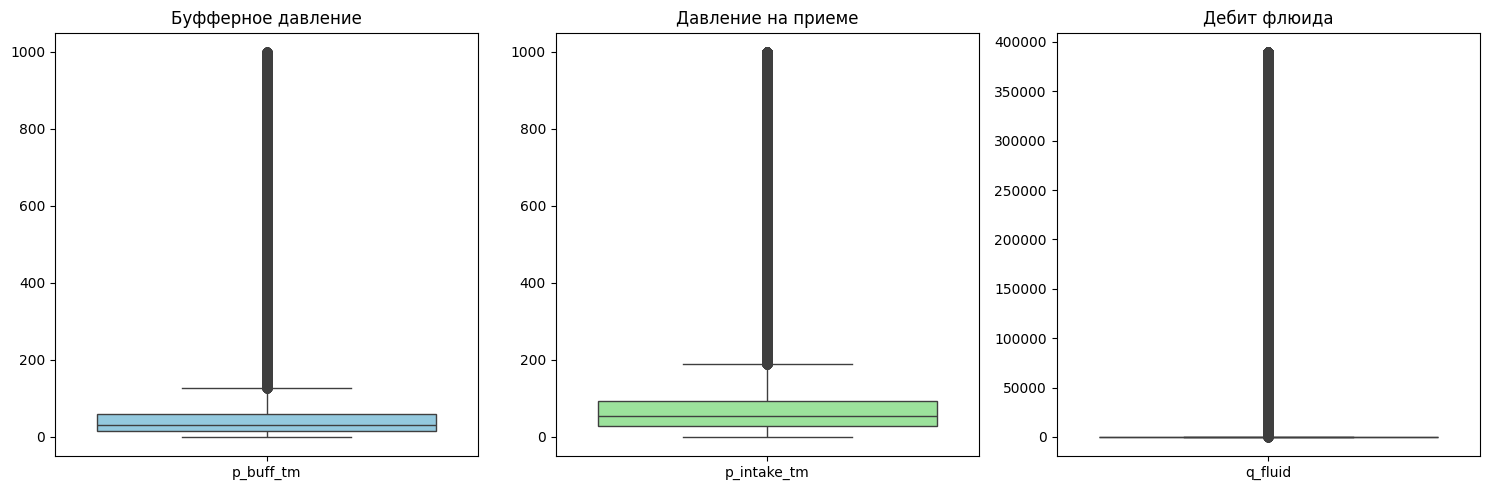

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# boxplot для ТМ и дебита флюида
sns.boxplot(data=df[['p_buff_tm']], ax=axes[0], color='skyblue')
axes[0].set_title('Буфферное давление')

sns.boxplot(data=df[['p_intake_tm']], ax=axes[1], color='lightgreen')
axes[1].set_title('Давление на приеме')

sns.boxplot(data=df[['q_fluid']], ax=axes[2], color='salmon')
axes[2].set_title('Дебит флюида')

plt.tight_layout()
plt.show()

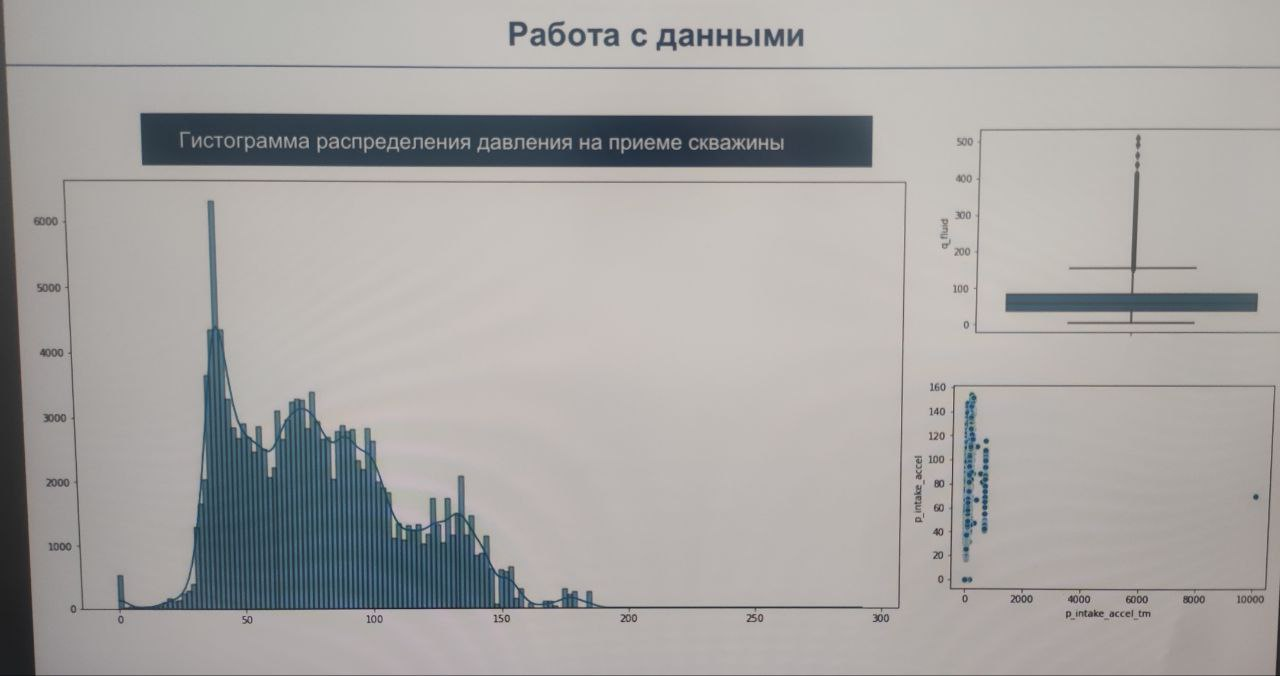

Согласно описательной статистике:
* Видны расхождения данных ТМ (телемеханика) и данных ручного ввода
* Наличие наблюдений с нулевами давлениями \ дебитами
* Наличие выбросов (видно по максимумам, большим разбросом между третим квантилем и максимум). Например, буфферное давление в 10к атмосфер

Удаление выбросов (задание адекватных диапазонов для параметров) будет производиться по установленным правилам геолога и эксперта Центра управления добычей, без ориентации на, например, boxplot

# Определение правил диапазонов данных

* Далее установим правила заполнения пропусков, работы с выбросами:
1. Заполнить все пропуски в признаках ТМ, данными ручного ввода (**ориентация на ТМ**)
2. Замена некорректных значений ТМ на значения ручного ввода
3. Определение границ диапазонов для параметров
4. Приведение к однофазному режиму: преобразование частоты вращения насоса
5. Удаление наблюдений, где таргет = 0
_____

1. Заполнение данными ручного ввода

In [ ]:
[col for col in df.columns if 'tm' in col]

['f_rotat_tm', 'p_buff_tm', 'p_intake_tm']

In [ ]:
# Замена пропусков ТМ на данные ручного ввода
df['f_rotat_tm'] = df['f_rotat_tm'].fillna(df['f_rotat'])
df['p_buff_tm'] = df['p_buff_tm'].fillna(df['p_buff'])
df['p_intake_tm'] = df['p_intake_tm'].fillna(df['p_intake'])

2. Замена некорректных значений ТМ на данные ручного ввода

Пример для **давления на приеме**. Если значение ТМ вне диапазона **[20; 170]**, а данные ручного ввода внутри этого диапазона, то меняем на данные ручного ввода

In [ ]:
# Давление на приеме [20; 170]
p_intake_range = df[((df['p_intake_tm'] < 20) | (df['p_intake_tm'] > 170)) & ((df['p_intake'] >= 20) & (df['p_intake'] <= 170))]

# Замена таких значений ТМ на данные ручного ввода
df.loc[p_intake_range.index, 'p_intake_tm'] = df.loc[p_intake_range.index, 'p_intake']

In [ ]:
df.loc[p_intake_range.index][['p_intake_tm', 'p_intake']]

,p_intake_tm,p_intake
3,78.996003,78.996003
4,58.511816,58.511816
10,90.693600,90.693600
20,61.623754,61.623754
22,38.678903,38.678903
...,...,...
714961,29.573087,29.573087
714967,74.622385,74.622385
714975,43.209395,43.209395
714980,58.808489,58.808489


In [ ]:
# Буфферное давление [10; 150]
p_buff_range = df[((df['p_buff_tm'] < 10) | (df['p_buff_tm'] > 150)) & ((df['p_buff'] >= 10) & (df['p_buff'] <= 150))]

# Замена таких значений ТМ на данные ручного ввода
df.loc[p_buff_range.index, 'p_buff_tm'] = df.loc[p_buff_range.index, 'p_buff']

3. Определение границ для диапазона параметров

* Давление на приеме скважины от 20 до 170 атм.

In [ ]:
df = df[(df['p_intake_tm'] >= 20) & (df['p_intake_tm'] <= 170)]

* Дебит флюида от 2 до 400

In [ ]:
df = df[(df['q_fluid'] >= 2) & (df['p_intake_tm'] <= 400)]

* Буфферное давление от 10 до 150 атм.

In [ ]:
df = df[(df['p_buff_tm'] >= 10) & (df['p_buff_tm'] <= 150)]

* Газовый фактор от 5 до 20 000

In [ ]:
df = df[(df['gas_factor'] >= 5) & (df['gas_factor'] <= 20000)]

In [ ]:
df.shape

(160279, 14)

4. Преобразование частоты вращения насоса

Если значение частоты вращения (Гц) в диапазоне от 60 до 120, то значение делится на 2. Если более 120, то делим на 3 (приводим к однофазному режиму)

In [ ]:
df['f_rotat_tm'] = df['f_rotat_tm'].apply(lambda x: x//2 if x >= 60 and x <= 120 else x)
df['f_rotat_tm'] = df['f_rotat_tm'].apply(lambda x: x//3 if x > 120 else x)

In [ ]:
df.head(3)

,well_name,xr,se,ss,f_rotat_tm,f_rotat,q_fluid,wcutting,p_buff,p_buff_tm,p_intake,p_intake_tm,gas_factor
3,45,Нефтяные,ЭЦН,В работе,9.593669,3.249651,49.542964,72.343806,6.364891,22.101419,7.626479,53.123577,488.392995
4,45,Нефтяные,ФОН,В работе,0.000000,39.603258,172148.715198,0.000000,209.146828,822.436434,53.511725,33.028929,1967.441744
10,45,Нефтяные,ФОН,В работе,11.800012,NaN,43.999267,1.772501,NaN,NaN,62.268556,62.268556,175.969785


In [ ]:
df.drop(['xr', 'ss'], axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)